## Dataset 

elliptic_txs_classes.csv: This dataset contains information about the classes or labels associated with each transaction in the Elliptic Data Set. Each row represents a transaction, and the dataset includes a column that indicates whether the transaction is related to money laundering (positive class) or not (negative class). This dataset is crucial for supervised machine learning, as it provides the ground truth labels for training and evaluating the model.

elliptic_txs_edgelist.csv: This dataset represents the edge list of transactions in the Bitcoin blockchain. It contains information about the connections between different transactions, where each row represents a directed edge from one transaction to another. This dataset is essential for analyzing the transaction network structure and understanding the flow of funds between different entities.

elliptic_txs_features.csv: This dataset includes features extracted from the transaction data for each transaction in the Elliptic Data Set. Each row corresponds to a transaction, and the dataset contains various columns representing different features. These features could include characteristics of the transaction, behavioral patterns, and other relevant attributes that can be used as input for machine learning models.

### To summarize:

- elliptic_txs_classes.csv provides the labels (positive/negative) for each transaction.
- elliptic_txs_edgelist.csv represents the transaction network structure.
- elliptic_txs_features.csv contains features extracted from the transaction data.


## Problem Statement:
- Through machine learning we can identify the patterns for every consumer that may lead
to money laundering like transferring money to foreign banks, big deposits, transaction
patterns etc.


The main objective of this project is to detect potential money laundering activities in cryptocurrency networks using machine learning techniques. The dataset used in this project is the Elliptic Data Set, which contains transaction data from the Bitcoin blockchain, labeled with information about whether each transaction is associated with money laundering or not.

The focus is on identifying patterns in the transaction behavior of consumers that may indicate money laundering activities. Such patterns could include:

Transferring Money to Foreign Banks: Transactions involving the transfer of funds to foreign banks or offshore accounts may be indicative of money laundering attempts to hide the source of the funds.

Big Deposits: Unusually large deposits or transactions may raise suspicion, as money launderers may try to move large sums of illicit funds to legitimate financial systems.

Unusual Transaction Patterns: Patterns of transactions that deviate significantly from normal or expected behaviors may be indicative of money laundering, as criminals may attempt to disguise their activities through complex transaction networks.

The goal of this project is to develop a machine learning model capable of accurately detecting money laundering patterns in the Elliptic Data Set. The model should be optimized for minimizing false negatives, as missing money laundering activities can have severe financial and legal consequences.

## Challenges and Other Objectives:

- The primary challenge is to build a robust machine learning model that can effectively detect money laundering patterns in cryptocurrency transaction data.
- Feature engineering and selection are crucial to capturing the relevant patterns indicative of money laundering activities.
- The dataset may have class imbalance, with a lower number of money laundering cases compared to legitimate transactions, necessitating appropriate handling of imbalanced data.
- Ensuring compliance with legal and ethical guidelines regarding the use of sensitive financial transaction data is essential.
- The model should be scalable and efficient to handle the large volume of cryptocurrency transactions in real-world scenarios.
- The project aims to contribute to the prevention of financial crimes, safeguarding cryptocurrency networks, and protecting users from - potential fraud and illicit activities.
- The successful implementation of this project will have significant implications for enhancing security and trust in cryptocurrency networks and financial systems as a whole.












In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample
from scipy.stats import ks_2samp

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load the three datasets
classes_data = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_classes.csv')
edgelist_data = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_edgelist.csv')
features_data = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_features.csv')

In [5]:
classes_data = classes_data.head(300)
features_data = features_data.head(300)

In [6]:
folder_path = "/home/suyodhan/Downloads/"
name = "elliptic_txs_classes.csv"
folder_path_class = folder_path + name

folder_path_feature = "/home/suyodhan/Downloads/"
name = "elliptic_txs_features.csv"
folder_path_feature  = folder_path_feature + name


In [7]:

classes_data.to_csv(folder_path_class, index=False, header=True)]
features_data.to_csv(folder_path_feature, index=False, header=True)

In [24]:
classes_data.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [25]:
classes_data.shape

(203769, 2)

In [26]:
classes_data['class'].unique()

array(['unknown', '2', '1'], dtype=object)

In [27]:
classes_data['class'].value_counts()

unknown    157205
2           42019
1            4545
Name: class, dtype: int64

In [28]:
classes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203769 entries, 0 to 203768
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   txId    203769 non-null  int64 
 1   class   203769 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


## Checking Missing Values

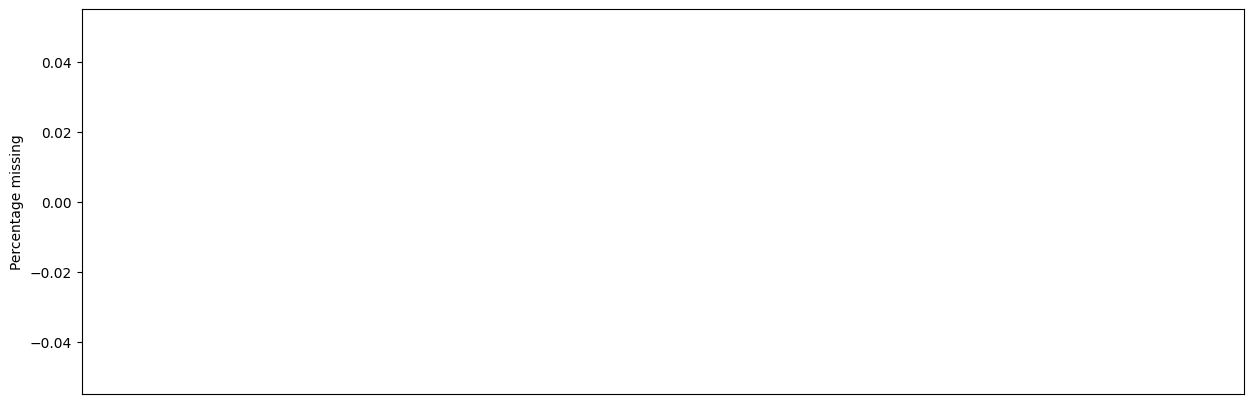

In [4]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = classes_data.isna().sum().div(classes_data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

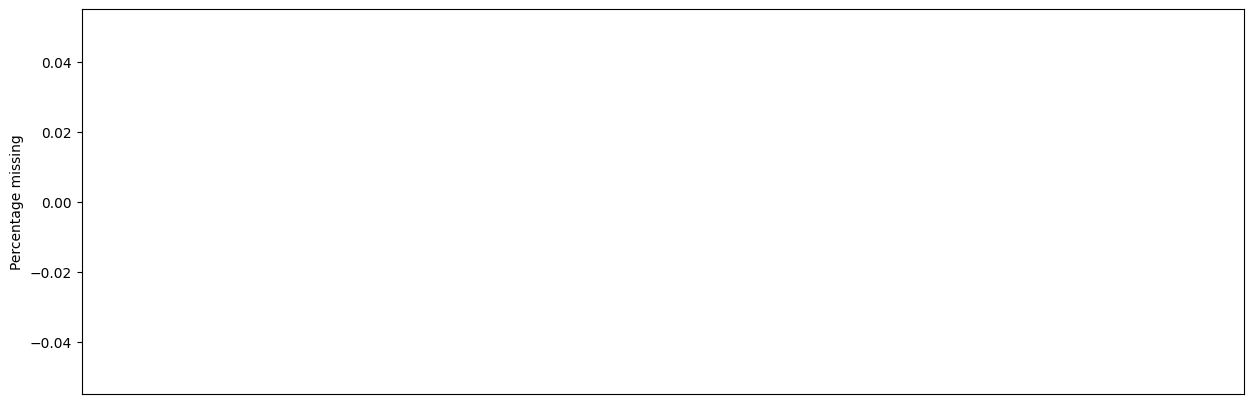

In [8]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = features_data.isna().sum().div(features_data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

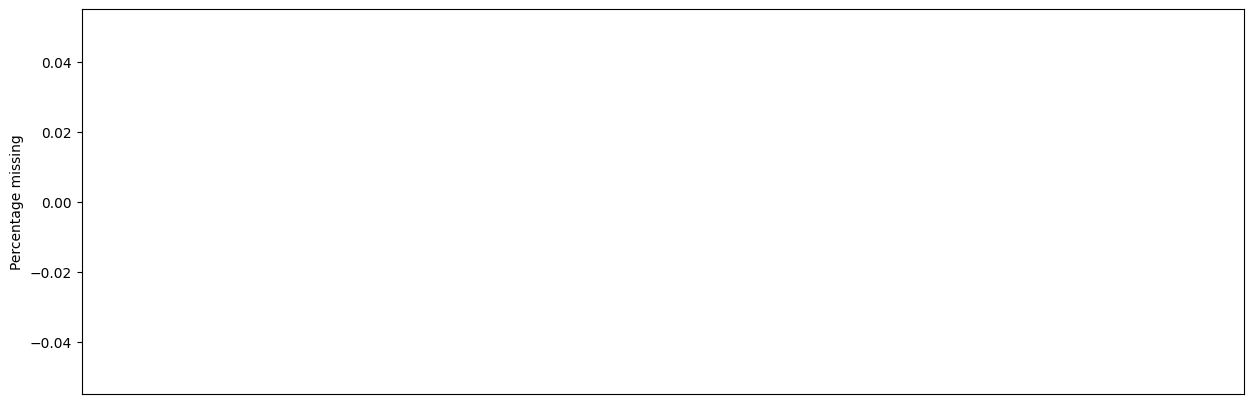

In [9]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = edgelist_data.isna().sum().div(edgelist_data.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [10]:
# Replace 'unknown' with the value 3
classes_data['class'] = classes_data['class'].replace('unknown',3)

In [11]:
classes_data['class'].value_counts()

3    157205
2     42019
1      4545
Name: class, dtype: int64

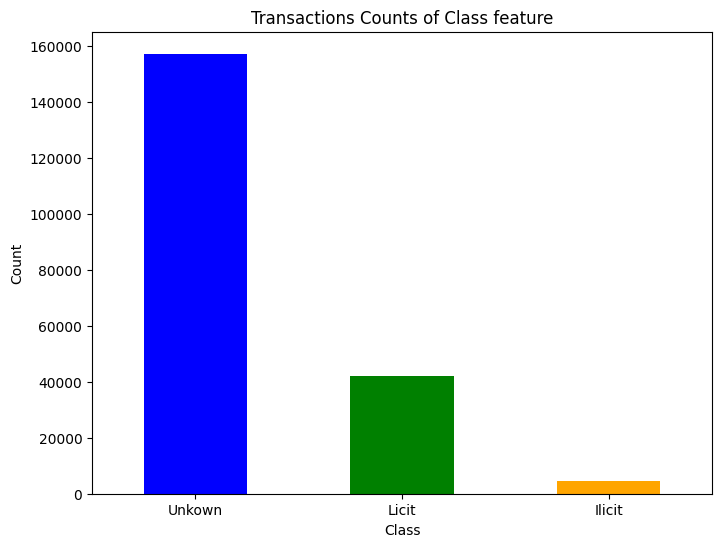

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the values 
value_counts = classes_data['class'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange']
value_counts.plot(kind='bar', color=colors)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Transactions Counts of Class feature')
plt.xticks(ticks=[0, 1, 2], labels=['Unkown', 'Licit', 'Ilicit'], rotation=0)

# Show the graph
plt.show()


In [13]:
classes_data.head()

,txId,class
0,230425980,3
1,5530458,3
2,232022460,3
3,232438397,2
4,230460314,3


In [14]:
# Relationship Analysis
print("Number of unique txIds in each class:")
print(classes_data.groupby('class')['txId'].nunique())


Number of unique txIds in each class:
class
3    157205
1      4545
2     42019
Name: txId, dtype: int64


## edgelist data

In [15]:
# Check for missing values in the edgelist data
print("Missing values in the edgelist data:")
print(edgelist_data.isnull().sum())

Missing values in the edgelist data:
txId1    0
txId2    0
dtype: int64


In [16]:
# Check the data types of columns in the edgelist data
print("Data types of columns in the edgelist data:")
print(edgelist_data.dtypes)

Data types of columns in the edgelist data:
txId1    int64
txId2    int64
dtype: object


In [17]:
edgelist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234355 entries, 0 to 234354
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   txId1   234355 non-null  int64
 1   txId2   234355 non-null  int64
dtypes: int64(2)
memory usage: 3.6 MB


In [18]:
# Summary statistics of the edgelist data
print("Summary statistics of the edgelist data:")
print(edgelist_data.describe())

Summary statistics of the edgelist data:
              txId1         txId2
count  2.343550e+05  2.343550e+05
mean   1.612218e+08  1.686881e+08
std    1.134457e+08  1.110120e+08
min    1.076000e+03  1.076000e+03
25%    6.933967e+07  7.342958e+07
50%    1.555782e+08  1.575814e+08
75%    2.433861e+08  2.454072e+08
max    4.032446e+08  4.032446e+08


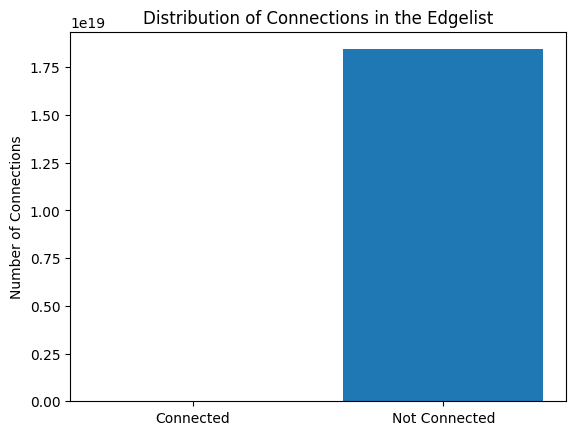

In [19]:
# Visualize the distribution of connections (edges)
connections_count = edgelist_data.shape[0]
plt.bar(['Connected', 'Not Connected'], [connections_count, 2**64 - connections_count])
plt.ylabel('Number of Connections')
plt.title('Distribution of Connections in the Edgelist')
plt.show()



In [20]:
edgelist_data_copy = edgelist_data.sample(frac=0.0001, random_state=42)

In [21]:
edgelist_data_copy.shape

(23, 2)

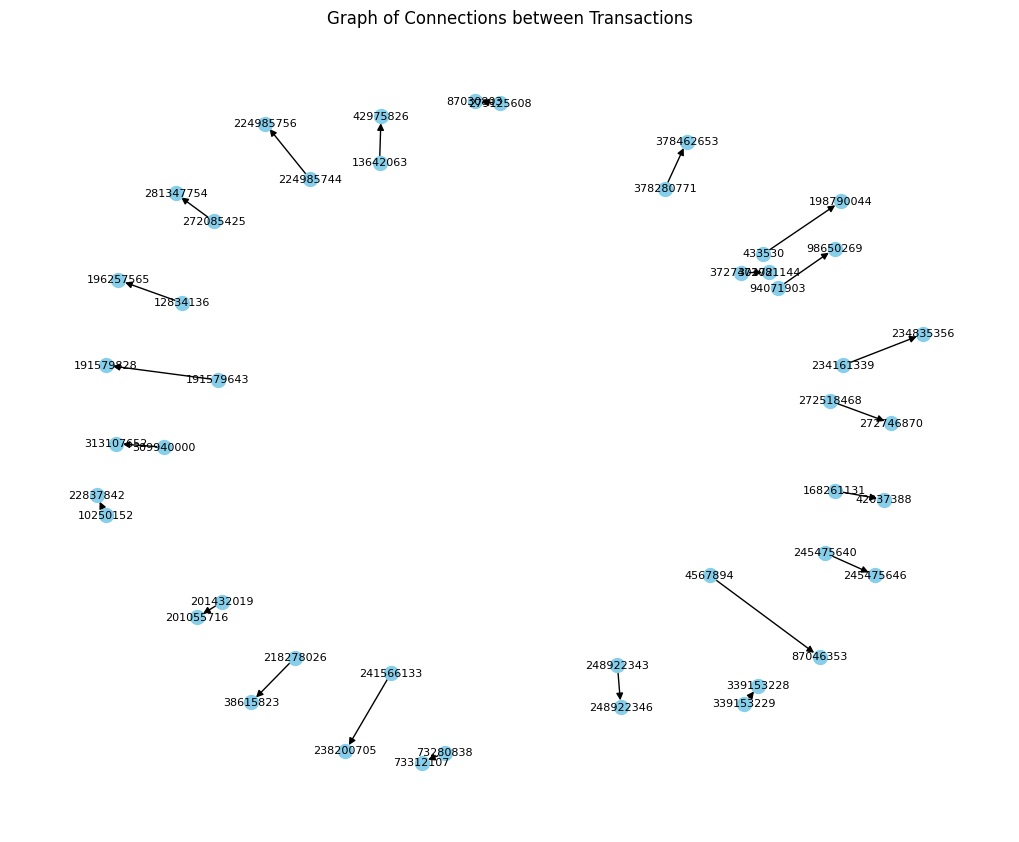

In [22]:
# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add edges to the graph from the edgelist data
for _, row in edgelist_data_copy.iterrows():
    G.add_edge(row['txId1'], row['txId2'])

# Plot the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)
plt.title('Graph of Connections between Transactions')
plt.show()

## Feature Data

In [23]:
features_data.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [24]:
features_data.columns

Index(['230425980', '1', '-0.1714692896288031', '-0.18466755143291433',
       '-1.2013688016765636', '-0.12196959975910057', '-0.04387454791734898',
       '-0.11300200928476244', '-0.06158379407303222', '-0.16209679981659642',
       ...
       '-0.5621534802884299', '-0.6009988905192808', '1.4613303209554889',
       '1.4613689382001922', '0.01827940003744589', '-0.0874901561101501',
       '-0.13115530389558736', '-0.09752359377152515', '-0.12061340670311574',
       '-0.11979245961251665'],
      dtype='object', length=167)

In [25]:
features_data.shape

(203768, 167)

In [26]:
classes_data.shape

(203769, 2)

In [27]:
features_data['1'].value_counts()

1     7879
42    7140
5     6803
10    6727
3     6621
36    6393
7     6048
22    5894
4     5693
45    5598
35    5507
41    5342
47    5121
43    5063
9     4996
44    4975
24    4592
2     4544
13    4528
32    4525
40    4481
8     4457
6     4328
11    4296
20    4291
29    4275
23    4165
15    3639
21    3537
46    3519
19    3506
17    3385
37    3306
33    3151
16    2975
48    2954
38    2891
31    2816
39    2760
26    2523
34    2486
30    2483
49    2454
25    2314
12    2047
14    2022
18    1976
28    1653
27    1089
Name: 1, dtype: int64

In [28]:
# 1. Explore Basic Statistics
# basic_stats = features_data.describe()
# print(basic_stats)


In [29]:

# If not, you can load it using pd.read_csv() or any other appropriate method

# Define the new column names
colNames = ['txId', 'Time_step']
colNames += [f'Local_feature_{i}' for i in range(1, 94)]
colNames += [f'Aggregate_feature_{i}' for i in range(1, 73)]

# Rename the columns of the DataFrame
features_data.columns = colNames

# Now the DataFrame 'features_data' has the updated column names
print(features_data.columns)


Index(['txId', 'Time_step', 'Local_feature_1', 'Local_feature_2',
       'Local_feature_3', 'Local_feature_4', 'Local_feature_5',
       'Local_feature_6', 'Local_feature_7', 'Local_feature_8',
       ...
       'Aggregate_feature_63', 'Aggregate_feature_64', 'Aggregate_feature_65',
       'Aggregate_feature_66', 'Aggregate_feature_67', 'Aggregate_feature_68',
       'Aggregate_feature_69', 'Aggregate_feature_70', 'Aggregate_feature_71',
       'Aggregate_feature_72'],
      dtype='object', length=167)


In [30]:
features_data.head()

,txId,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


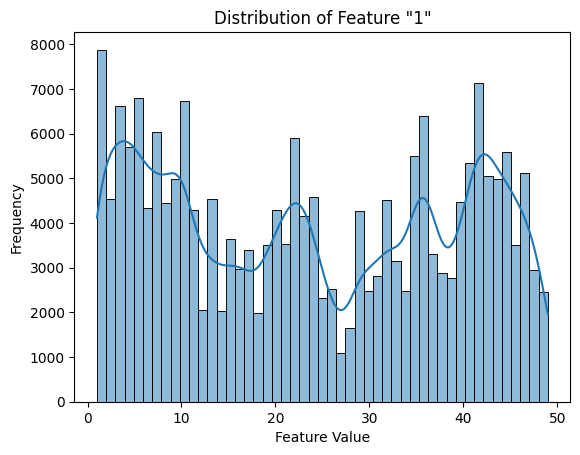

In [31]:
# Choose a numerical feature to visualize (e.g., '1' represents the second column)
sns.histplot(features_data['Time_step'], kde=True)
plt.title('Distribution of Feature "1"')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()

In [51]:
features_data['Time_step'].value_counts()

1     7879
42    7140
5     6803
10    6727
3     6621
36    6393
7     6048
22    5894
4     5693
45    5598
35    5507
41    5342
47    5121
43    5063
9     4996
44    4975
24    4592
2     4544
13    4528
32    4525
40    4481
8     4457
6     4328
11    4296
20    4291
29    4275
23    4165
15    3639
21    3537
46    3519
19    3506
17    3385
37    3306
33    3151
16    2975
48    2954
38    2891
31    2816
39    2760
26    2523
34    2486
30    2483
49    2454
25    2314
12    2047
14    2022
18    1976
28    1653
27    1089
Name: Time_step, dtype: int64

In [32]:
## Merging dataset

# Merge the two DataFrames based on the 'txId1' column
merged_data = features_data.merge(classes_data, on='txId', how='left')

In [53]:
merged_data.head()

,txId,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,3


## Merge Dataset

In [37]:
### Saving the datset 

merged_data.to_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/dataset.csv', index=False)

In [34]:
df = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/dataset.csv')

In [35]:
df.shape

(161684, 168)

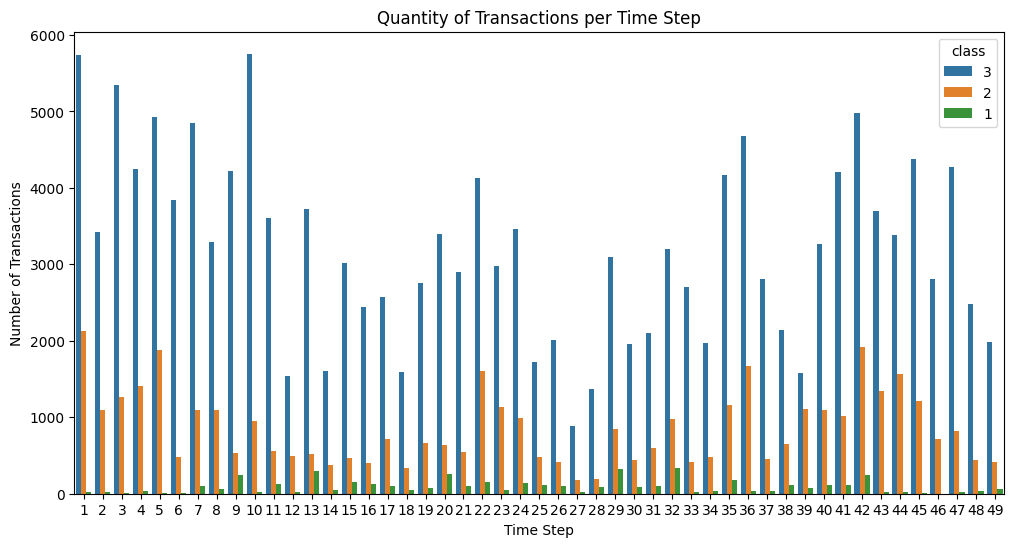

In [54]:
# Countplot: Bar plot of transactions per time step
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_data, x='Time_step', hue='class')
plt.title('Quantity of Transactions per Time Step')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.show()

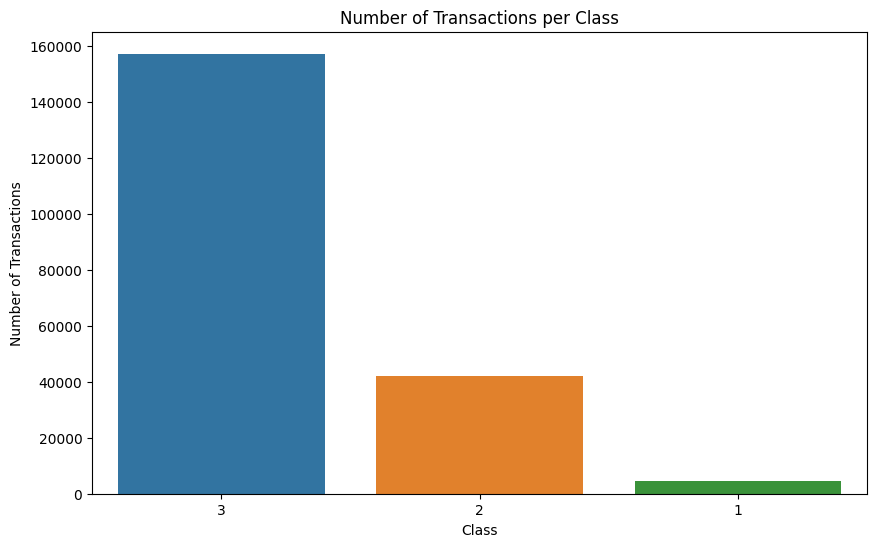

In [55]:

# Count plot: Transactions per Class
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='class')
plt.title('Number of Transactions per Class')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()


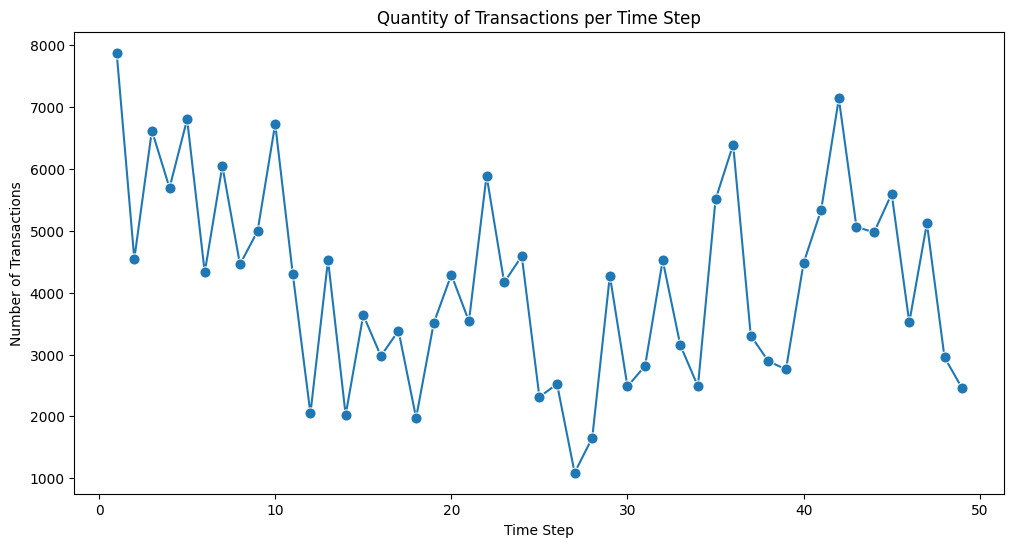

In [53]:
# Calculate the count of transactions per Time_step
transactions_per_time_step = merged_data['Time_step'].value_counts().sort_index()

# Line chart: Transactions per Time_step
plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_per_time_step, marker='o', markersize=8, linestyle='-')
plt.title('Quantity of Transactions per Time Step')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.show()

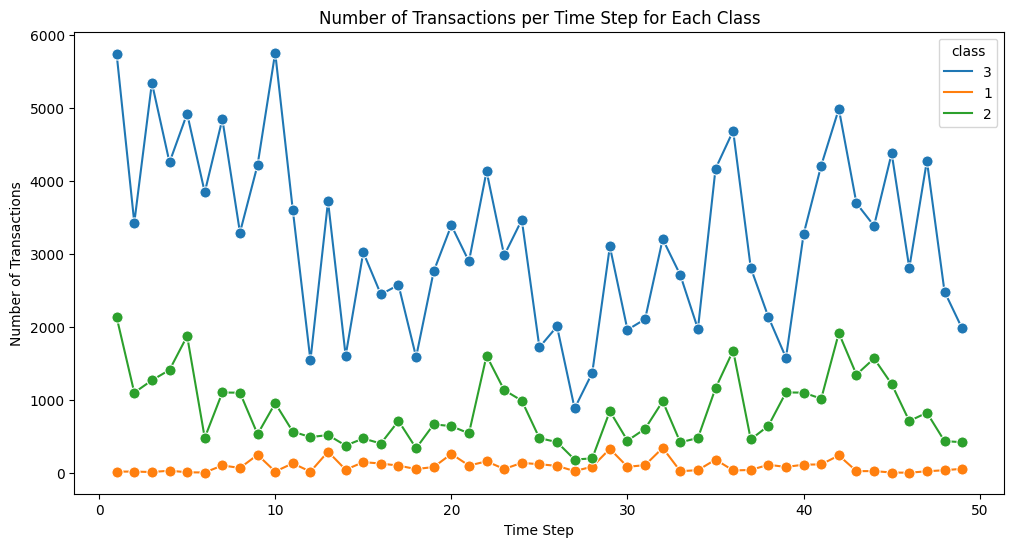

In [64]:
# with columns 'class' and 'Time_step' representing the class and time step.


# Calculate the number of transactions per class and time step
transactions_count = merged_data.groupby(['class', 'Time_step']).size().reset_index(name='Number of Transactions')

# Create a line plot for each class
plt.figure(figsize=(12, 6))
sns.lineplot(data=transactions_count, x='Time_step', y='Number of Transactions', hue='class', marker='o', markersize=8)

# Set the title and labels
plt.title('Number of Transactions per Time Step for Each Class')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')

# Show the plot
plt.show()

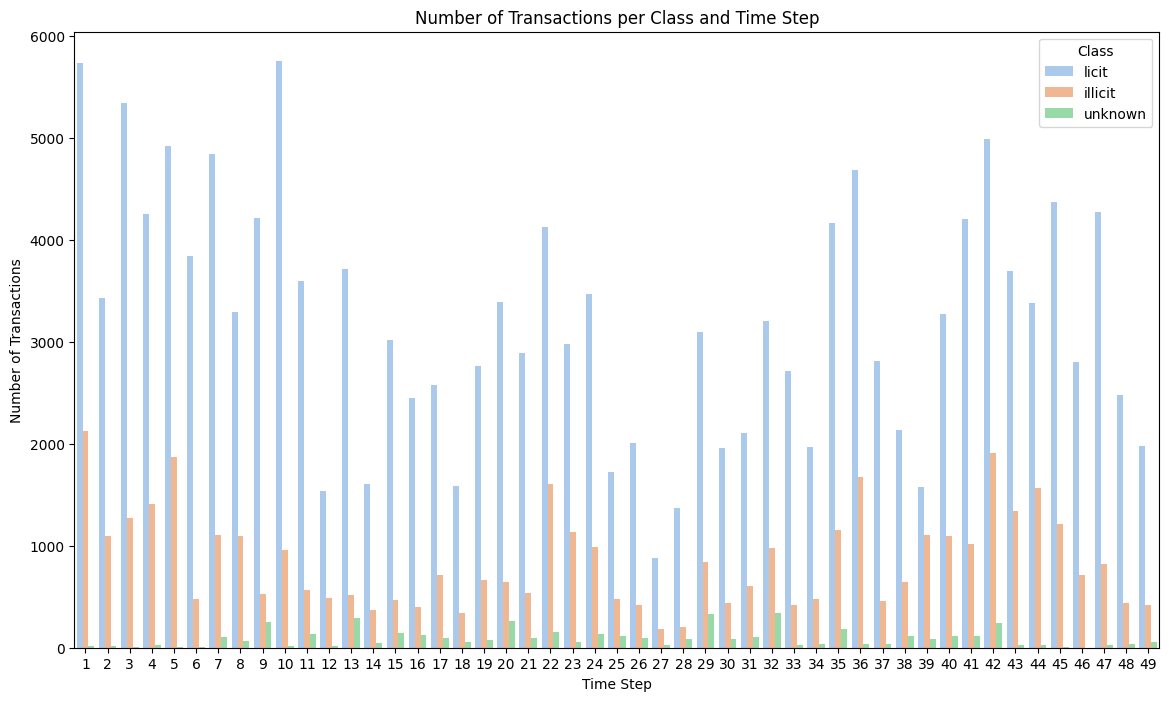

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a clustered bar plot using seaborn
plt.figure(figsize=(14, 8))
sns.countplot(data=merged_data, x='Time_step', hue='class', palette='pastel')
plt.title('Number of Transactions per Class and Time Step')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.legend(title='Class', loc='upper right', labels=['licit', 'illicit', 'unknown'])
plt.show()


# dataset

In [54]:
df = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/dataset.csv')

In [55]:
df.head()

,txId,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,3


### Plot distribution of all Independent Numerical variables

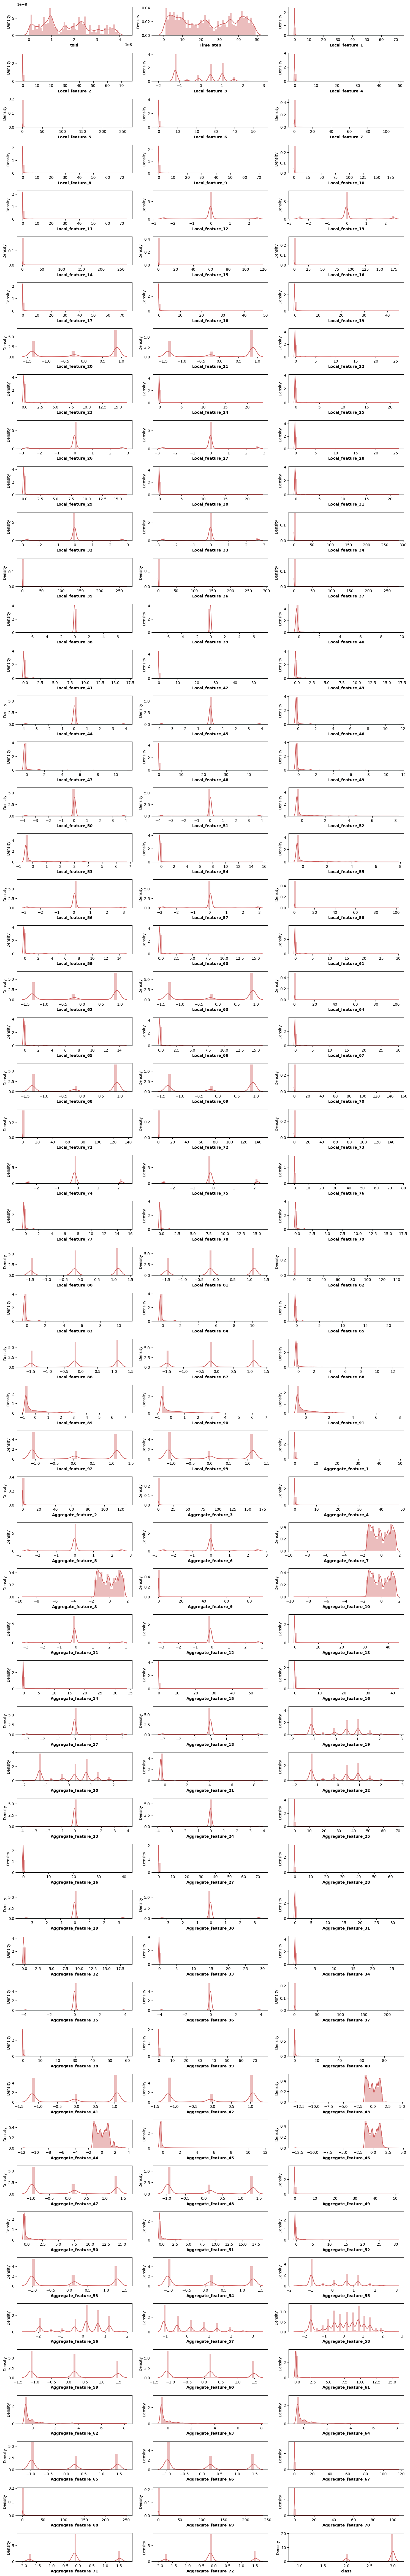

In [44]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Create Functions for model training and evaluation

In [42]:
# def evaluate_clf(true, predicted):
#     '''
#     This function takes in true values and predicted values
#     Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
#     '''
#     acc = accuracy_score(true, predicted) # Calculate Accuracy
#     f1 = f1_score(true, predicted) # Calculate F1-score
#     precision = precision_score(true, predicted) # Calculate Precision
#     recall = recall_score(true, predicted)  # Calculate Recall
#     roc_auc = roc_auc_score(true, predicted) #Calculate Roc
#     return acc, f1 , precision, recall, roc_auc




def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted, average='weighted') # Calculate F1-score with 'weighted' average
    precision = precision_score(true, predicted, average='weighted') # Calculate Precision with 'weighted' average
    recall = recall_score(true, predicted, average='weighted')  # Calculate Recall with 'weighted' average
    roc_auc = roc_auc_score(true, predicted, average='weighted') # Calculate Roc with 'weighted' average
    return acc, f1, precision, recall, roc_auc

In [43]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [44]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        # print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        # print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [45]:
df.head()

,txId,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,3


In [8]:
X = df.drop(columns=['txId', 'class'])
y = df['class']

In [9]:
X.head()

,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [10]:
y.head()

0    3
1    3
2    2
3    3
4    3
Name: class, dtype: int64

In [11]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [12]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 1 || accuracy (0.4198)


/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 3 || accuracy (0.4198)


/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 5 || accuracy (0.4198)


/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 7 || accuracy (0.4198)


/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 9 || accuracy (0.4198)


In [13]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [14]:
X_knn =knn_pipeline.fit_transform(X)

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import numpy as np

# Assuming X_knn and y are the feature matrix and target vector, respectively

# Define batch size and k_neighbors for SMOTE
batch_size = 1000
k_neighbors = 5  # Adjust this value as needed

# Calculate the number of batches
num_batches = int(np.ceil(len(X_knn) / batch_size))

# Initialize empty arrays to store the resampled data
X_resampled_batches = []
y_resampled_batches = []

# SMOTE resampling batch-wise
smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, n_jobs=-1)

try:
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(X_knn))

        # Get the current batch
        X_batch = X_knn[start_idx:end_idx]
        y_batch = y[start_idx:end_idx]

        # Apply SMOTE to the current batch
        X_batch_resampled, y_batch_resampled = smote.fit_resample(X_batch, y_batch)

        # Append the resampled data of the current batch to the arrays
        X_resampled_batches.append(X_batch_resampled)
        y_resampled_batches.append(y_batch_resampled)

    # Combine the resampled data from all batches
    X_resampled = np.concatenate(X_resampled_batches)
    y_resampled = np.concatenate(y_resampled_batches)

    print("SMOTE resampling completed successfully!")

    # Now, apply TomekLinks to remove Tomek pairs from the resampled data
    tomek = TomekLinks()
    X_resampled_tomek, y_resampled_tomek = tomek.fit_resample(X_resampled, y_resampled)

    print("TomekLinks undersampling completed successfully!")

    # Now you can use the resampled X_resampled_tomek and y_resampled_tomek for further analysis or modeling.
    # For example:
    # - Train a machine learning model on the resampled data.
    # - Evaluate the model's performance on a test set.

except KeyboardInterrupt:
    print("Resampling interrupted by the user.")
except Exception as e:
    print("Error occurred during resampling:", e)


Error occurred during resampling: Expected n_neighbors <= n_samples,  but n_samples = 1, n_neighbors = 6


In [15]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [17]:
from imblearn.combine import SMOTETomek
import numpy as np

# Assuming X_knn and y are the feature matrix and target vector, respectively

# Define batch size and n_neighbors
batch_size = 1000
n_neighbors = 5  # Adjust this value as needed

# Calculate the number of batches
num_batches = int(np.ceil(len(X_knn) / batch_size))

# Initialize empty arrays to store the resampled data
X_resampled_batches = []
y_resampled_batches = []

# Resampling the minority class batch-wise
smt = SMOTETomek(random_state=42, sampling_strategy='auto', n_neighbors=n_neighbors, n_jobs=-1)

try:
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(X_knn))

        # Get the current batch
        X_batch = X_knn[start_idx:end_idx]
        y_batch = y[start_idx:end_idx]

        # Fit the model to generate the resampled data for the current batch
        X_resampled_batch, y_resampled_batch = smt.fit_resample(X_batch, y_batch)

        # Append the resampled data of the current batch to the arrays
        X_resampled_batches.append(X_resampled_batch)
        y_resampled_batches.append(y_resampled_batch)

    # Combine the resampled data from all batches
    X_resampled = np.concatenate(X_resampled_batches)
    y_resampled = np.concatenate(y_resampled_batches)

    print("Resampling completed successfully!")

    # Now you can use the resampled X_resampled and y_resampled for further analysis or modeling.
    # For example:
    # - Train a machine learning model on the resampled data.
    # - Evaluate the model's performance on a test set.

except KeyboardInterrupt:
    print("Resampling interrupted by the user.")
except Exception as e:
    print("Error occurred during resampling:", e)


TypeError: __init__() got an unexpected keyword argument 'n_neighbors'

In [48]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Create a function to evaluate classification metrics for multi-class
def evaluate_clf(true, predicted, average='macro'):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted, average=average)
    precision = precision_score(true, predicted, average=average)
    recall = recall_score(true, predicted, average=average)
    return acc, f1, precision, recall

# Create a function to calculate the total cost for multi-class
def total_cost(y_true, y_pred):
    cost = 0
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            if y_pred[i] == 0:
                cost += 10
            elif y_pred[i] == 1:
                cost += 500
    return cost

# Create the evaluate_models function for multi-class
def evaluate_models(X, y, models, average='macro'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    cost_list = []
    models_list = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_clf(y_train, y_train_pred, average=average)
        train_cost = total_cost(y_train, y_train_pred)

        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_clf(y_test, y_test_pred, average=average)
        test_cost = total_cost(y_test, y_test_pred)

        models_list.append(model_name)

        print(f'Model: {model_name}')
        print('Model performance for Training set')
        print(f'- Accuracy: {model_train_accuracy:.4f}')
        print(f'- F1 Score: {model_train_f1:.4f}')
        print(f'- Precision: {model_train_precision:.4f}')
        print(f'- Recall: {model_train_recall:.4f}')
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print(f'- Accuracy: {model_test_accuracy:.4f}')
        print(f'- F1 Score: {model_test_f1:.4f}')
        print(f'- Precision: {model_test_precision:.4f}')
        print(f'- Recall: {model_test_recall:.4f}')
        print(f'- COST: {test_cost}.')
        
        cost_list.append(test_cost)
        print('=' * 35)
        print('\n')
        
    report = pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
    return report


In [49]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier()
}

In [50]:
report_knn = evaluate_models(X, y, models)

KeyError: 4

In [51]:
df['class'].value_counts()

3    157204
2     42019
1      4545
Name: class, dtype: int64

In [52]:
print(set(y))


{1, 2, 3}


In [53]:
print(set(y_train_pred))
print(set(y_test_pred))


NameError: name 'y_train_pred' is not defined

# Personal

In [4]:
df = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/dataset.csv')

In [5]:
df.head()

,txId,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,3


In [6]:
df.columns

Index(['txId', 'Time_step', 'Local_feature_1', 'Local_feature_2',
       'Local_feature_3', 'Local_feature_4', 'Local_feature_5',
       'Local_feature_6', 'Local_feature_7', 'Local_feature_8',
       ...
       'Aggregate_feature_64', 'Aggregate_feature_65', 'Aggregate_feature_66',
       'Aggregate_feature_67', 'Aggregate_feature_68', 'Aggregate_feature_69',
       'Aggregate_feature_70', 'Aggregate_feature_71', 'Aggregate_feature_72',
       'class'],
      dtype='object', length=168)

In [69]:
for i in df.columns:
    print('-', i, ':', 'float')



- txId : float
- Time_step : float
- Local_feature_1 : float
- Local_feature_2 : float
- Local_feature_3 : float
- Local_feature_4 : float
- Local_feature_5 : float
- Local_feature_6 : float
- Local_feature_7 : float
- Local_feature_8 : float
- Local_feature_9 : float
- Local_feature_10 : float
- Local_feature_11 : float
- Local_feature_12 : float
- Local_feature_13 : float
- Local_feature_14 : float
- Local_feature_15 : float
- Local_feature_16 : float
- Local_feature_17 : float
- Local_feature_18 : float
- Local_feature_19 : float
- Local_feature_20 : float
- Local_feature_21 : float
- Local_feature_22 : float
- Local_feature_23 : float
- Local_feature_24 : float
- Local_feature_25 : float
- Local_feature_26 : float
- Local_feature_27 : float
- Local_feature_28 : float
- Local_feature_29 : float
- Local_feature_30 : float
- Local_feature_31 : float
- Local_feature_32 : float
- Local_feature_33 : float
- Local_feature_34 : float
- Local_feature_35 : float
- Local_feature_36 : float
- 

In [7]:
for i in df.columns:
    print('-', i)


- txId
- Time_step
- Local_feature_1
- Local_feature_2
- Local_feature_3
- Local_feature_4
- Local_feature_5
- Local_feature_6
- Local_feature_7
- Local_feature_8
- Local_feature_9
- Local_feature_10
- Local_feature_11
- Local_feature_12
- Local_feature_13
- Local_feature_14
- Local_feature_15
- Local_feature_16
- Local_feature_17
- Local_feature_18
- Local_feature_19
- Local_feature_20
- Local_feature_21
- Local_feature_22
- Local_feature_23
- Local_feature_24
- Local_feature_25
- Local_feature_26
- Local_feature_27
- Local_feature_28
- Local_feature_29
- Local_feature_30
- Local_feature_31
- Local_feature_32
- Local_feature_33
- Local_feature_34
- Local_feature_35
- Local_feature_36
- Local_feature_37
- Local_feature_38
- Local_feature_39
- Local_feature_40
- Local_feature_41
- Local_feature_42
- Local_feature_43
- Local_feature_44
- Local_feature_45
- Local_feature_46
- Local_feature_47
- Local_feature_48
- Local_feature_49
- Local_feature_50
- Local_feature_51
- Local_feature_52
- 

In [9]:
X = df.drop(columns=['txId', 'class'])
y = df['class']

In [10]:
# from sklearn.model_selection import train_test_split

# Assuming X contains the features and y contains the target variable (labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
def pyod_predict_scores(X_train, X_test, y_train, model, predict_on='test', semisupervised=False):
    if semisupervised == True:
        X_train = X_train[y_train == 0]

    model.fit(X_train)

In [12]:
def contamination_to_threshold(contamination, prediction_scores):
    prediction_threshold = np.quantile(prediction_scores, 1 - contamination)
    return prediction_threshold

In [13]:
def get_thresholds_for_all_contamination_levels(contamination_levels, predicted_scores):
    thresholds = {}
    for contamination in contamination_levels:
        thresholds[contamination] = contamination_to_threshold(contamination, predicted_scores)
    return thresholds

In [14]:
def predict_based_on_threshold(threshold, predicted_scores, formula='greater_or_equal'):
    if formula == 'greater_or_equal':
        y_pred = [1 if score >= threshold else 0 for score in predicted_scores]
    if formula == 'greater':
        y_pred = [1 if score > threshold else 0 for score in predicted_scores]
    return y_pred

In [15]:
def pyod_per_contamination_level(X_train, X_test, y_train, contamination_levels, model, predict_on='test',
                                 semisupervised=False):
    """ Accepts a list of contamination levels and a single model"""
    predicted_scores = pyod_predict_scores(X_train, X_test, y_train, model, predict_on, semisupervised)
    thresholds = get_thresholds_for_all_contamination_levels(contamination_levels, predicted_scores)

    predictions_at_contamination_levels = {}
    for level, thresh in thresholds.items():
        predictions = predict_based_on_threshold(thresh, predicted_scores)
        predictions_at_contamination_levels[level] = predictions
    return predictions_at_contamination_levels, predicted_scores

In [16]:
def batch_pyod_per_contamination_level(X_train, X_test, y_train, contamination_levels, model_dict, predict_on='test',
                                       semisupervised=False):
    """ Accepts a dictionary of {'model_name': model} and a list of contamination levels"""

    predictions_dict = model_dict.copy()
    predicted_scores_dict = {key: None for key in model_dict}
    for model_name, model in model_dict.items():
        print('Starting model ', model_name)
        predictions, predicted_scores = pyod_per_contamination_level(X_train, X_test, y_train,
                                                                     contamination_levels, model, predict_on,
                                                                     semisupervised)
        predictions_dict[model_name] = predictions
        predicted_scores_dict[model_name] = predicted_scores
    return predictions_dict, predicted_scores_dict

In [ ]:
import numpy as np
from experiments.general_functions.elliptic_data_preprocessing import run_elliptic_preprocessing_pipeline
from reaml.models import batch_pyod_per_contamination_level
from reaml.model_performance import metric_per_contamination_level
from pyod.models.pca import PCA
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.models.iforest import IForest
from reaml.models import supervised_model_per_contamination_level
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Import Elliptic data set and set variables
last_time_step = 49
last_train_time_step = 34
only_labeled = True

X_train_df, X_test_df, y_train, y_test = run_elliptic_preprocessing_pipeline(last_train_time_step=last_train_time_step,
                                                                             last_time_step=last_time_step,
                                                                             only_labeled=only_labeled)

# Run anomaly detection methods and save the results. In this case return_model_predictions = True.

contamination_levels = np.arange(0, 1.01, 0.05)

model_dict = {'PCA': PCA(), 'LOF': LOF(), 'CBLOF': CBLOF(), 'IF': IForest(), 'KNN': KNN(), 'ABOD': ABOD(),
              'OCSVM': OCSVM()}

model_predictions, model_predicted_scores = batch_pyod_per_contamination_level(X_train_df=X_train_df, X_test_df=X_test_df, y_train=y_train,
                                                                                   contamination_levels=contamination_levels, model_dict=model_dict)

random_forest = RandomForestClassifier()

predictions_at_contamination_levels, _ = supervised_model_per_contamination_level(X_train_df, X_test_df, y_train,
                                                                                  contamination_levels, random_forest)

model_predictions['Random Forest'] = predictions_at_contamination_levels


model_stats_df = metric_per_contamination_level(y_true=y_test, metric='f1', model_predictions=model_predictions)

f1_per_contamination_level = model_stats_df.pivot(index='model', columns='contamination_level', values='f1')
f1_per_contamination_level = f1_per_contamination_level.round(2)
f1_per_contamination_level.columns = np.round(f1_per_contamination_level.columns, 2)

f1_per_contamination_level_reduced = f1_per_contamination_level.iloc[:, 1:5]
f1_per_contamination_level_reduced.sort_values(0.2, ascending=False)


In [19]:
import os, sys

from script.logger import logging
from script.exception import MoneyLaunderingException


from script.utils.main_utils import read_yaml_file
# from config import sche     
SCHEMA_FILE_PATH = os.path.join("config", "schema.yaml")

In [22]:
SCHEMA_FILE_PATH 

'config/schema.yaml'

In [23]:
a = read_yaml_file('/home/suyodhan/Money-Laundering-Prevention/config/schema.yaml')

In [10]:
dataframe = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/dataset.csv')

In [28]:
def validate_number_of_columns(dataframe: pd.DataFrame):
        try:
            number_of_columns = len(a['columns'])
            
            if len(dataframe.columns) == number_of_columns:
                # logging.info(f"Required number of columns: {number_of_columns}")
                # logging.info(f"Data frame has columns: {len(dataframe.columns)}")
                # logging.info("Number of columns validation passed.")
                return True
            else:
                # logging.warning(f"Number of columns validation failed. Expected: {number_of_columns}, Actual: {len(dataframe.columns)}")
                return False

        except Exception as e:
            # logging.error("Error during column validation:", exc_info=True)
            raise MoneyLaunderingException(e, sys)

In [29]:
result = validate_number_of_columns(dataframe=dataframe)
print(result)

True


In [30]:
def txId_has_unique_values(dataframe):
        
    txId_unique = dataframe['txId'].nunique()
    total_records = dataframe.shape[0]

    if txId_unique == total_records:
        return True
    else:
        return False

   


In [31]:
print(txId_has_unique_values(dataframe))

True


In [32]:
 dataframe['txId'].nunique()

203768

In [33]:
dataframe.shape[0]

203768

In [34]:
def time_step_has_positive_values(dataframe):
        
    time_step_positive = (dataframe['Time_step'] > 0).all()
    return time_step_positive

In [35]:
print(time_step_has_positive_values(dataframe))

True


In [36]:
def valid_class_labels(dataframe, allowed_labels):
    
    class_column = 'class'
    
    if class_column not in dataframe.columns:
        raise MoneyLaunderingException(f"'{class_column}' column not found in the DataFrame.")

    unique_labels = dataframe[class_column].unique()
    invalid_labels = [label for label in unique_labels if label not in allowed_labels]

    if not invalid_labels:
        return True, []

    return False, invalid_labels

   

In [52]:
allowed_labels = a["label_columns"][0]["class"]

# print(valid_class_labels(dataframe, allowed_labels))

KeyError: 'label_columns'

In [48]:
allowed_labels

'category'

In [60]:
def validate_class_labels1(dataframe: pd.DataFrame):

    class_column = 'class'
    
    if class_column not in dataframe.columns:
        raise MoneyLaunderingException(f"'{class_column}' column not found in the DataFrame.")

    allowed_labels = a["label_columns"][0].get(class_column, [])  # Extract allowed labels from schema
    unique_labels = dataframe[class_column].unique()
    invalid_labels = [label for label in unique_labels if label not in allowed_labels]

    if not invalid_labels:
        return True, []

    return False, invalid_labels

In [61]:
validate_class_labels1(dataframe)

KeyError: 'label_columns'

In [63]:
a["label_columns"][0]

KeyError: 'label_columns'

In [1]:
from script.entity.config_entity import TrainingPipelineConfig,DataIngestionConfig,DataValidationConfig
from script.entity.artifact_entity import DataIngestionArtifact, DataValidationArtifact

ModuleNotFoundError: No module named 'script.entity.config_entity'

In [12]:
train_dataframe = pd.read_csv("/home/suyodhan/Money-Laundering-Prevention/artifact/20230801_195548/data_ingestion/ingested/train.csv")
test_dataframe = pd.read_csv("/home/suyodhan/Money-Laundering-Prevention/artifact/20230801_195548/data_ingestion/ingested/test.csv")



In [13]:
def txId_has_unique_values(dataframe : pd.DataFrame) -> bool:

    txId_unique = dataframe['txId'].nunique()
    print(txId_unique)
    total_records = dataframe.shape[0]
    print(total_records)

    if txId_unique == total_records:
        return True
    else:
        return False



In [15]:
txId_has_unique_values(dataframe=test_dataframe)

40754
40754


True

In [4]:
base_df = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/artifact/20230801_201557/data_ingestion/ingested/train.csv')
current_df = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/artifact/20230801_201557/data_ingestion/ingested/test.csv')

In [7]:
def detect_dataset_drift(base_df,current_df,threshold=0.05)->bool:
    status=True
    report ={}
    for column in base_df.columns:
        d1 = base_df[column]
        d2  = current_df[column]
        is_same_dist = ks_2samp(d1,d2)
        if threshold<=is_same_dist.pvalue:
            is_found=False
        else:
            is_found = True 
            status=False
        report.update({column:{
            "p_value":float(is_same_dist.pvalue),
            "drift_status":is_found
            
            }})
    
    

    return report
    

In [8]:
print(detect_dataset_drift(base_df, current_df))

{'txId': {'p_value': 0.9317852649246376, 'drift_status': False}, 'Time_step': {'p_value': 0.9898392936853679, 'drift_status': False}, 'Local_feature_1': {'p_value': 0.6274904858091223, 'drift_status': False}, 'Local_feature_2': {'p_value': 0.7332822421673919, 'drift_status': False}, 'Local_feature_3': {'p_value': 0.9478641386070599, 'drift_status': False}, 'Local_feature_4': {'p_value': 0.8867981664556528, 'drift_status': False}, 'Local_feature_5': {'p_value': 0.9977539374987566, 'drift_status': False}, 'Local_feature_6': {'p_value': 0.9716138491245659, 'drift_status': False}, 'Local_feature_7': {'p_value': 0.9999877199707305, 'drift_status': False}, 'Local_feature_8': {'p_value': 0.3574335004346987, 'drift_status': False}, 'Local_feature_9': {'p_value': 0.566425478020381, 'drift_status': False}, 'Local_feature_10': {'p_value': 0.9934721682673759, 'drift_status': False}, 'Local_feature_11': {'p_value': 0.5446059225115103, 'drift_status': False}, 'Local_feature_12': {'p_value': 0.994440

In [11]:
std_deviation = dataframe.std()


# Drop columns with zero standard deviation

In [13]:
# Identify columns with zero standard deviation
zero_std_columns = std_deviation[std_deviation == 0].index


In [17]:
dataframe.head()

,txId,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,3


In [2]:
df_feature =  pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_features.csv')

In [3]:
df_feature.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Load your dataset (replace with your actual data loading code)
# df = pd.read_csv('your_dataset.csv')

# Assuming you have loaded the dataset into a DataFrame named df

# Select relevant features for anomaly detection
transaction_features = dataframe.iloc[:, :94]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(transaction_features)

# Train Isolation Forest model for anomaly detection
model = IsolationForest(contamination=0.05, random_state=42)
model.fit(scaled_features)

# Predict anomalies (1 for inliers, -1 for outliers)
anomaly_predictions = model.predict(scaled_features)

# Add anomaly predictions to the DataFrame
dataframe['anomaly_prediction'] = anomaly_predictions

# Evaluate the model (assuming you have labels for evaluation)
true_labels = dataframe['true_label_column']  # Replace with the actual column name
classification_report_result = classification_report(true_labels, anomaly_predictions)

print("Classification Report:\n", classification_report_result)


KeyError: 'true_label_column'

In [4]:
data = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/dataset.csv')

In [3]:
import pandas as pd

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Load the dataset
# data = pd.read_csv('transaction_dataset.csv')

# Separate features (X) and labels (y)
X = data.drop(columns=['class'])  # Assuming 'label' is the column representing the target
y = data['class']

# Split the data into sequential train and test sets
X_train = X[X['Time_step'] <= 34]
X_test = X[X['Time_step'] >= 35]
y_train = y[X['Time_step'] <= 34]
y_test = y[X['Time_step'] >= 35]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate the F1-score for the illicit class
illicit_f1_score = f1_score(y_test, y_pred, pos_label='illicit', average='weighted')
print('Illicit F1-score:', illicit_f1_score)


Illicit F1-score: 0.9008114319694773


In [11]:
X_train.shape

(136264, 167)

In [12]:
y_test.shape

(67504,)

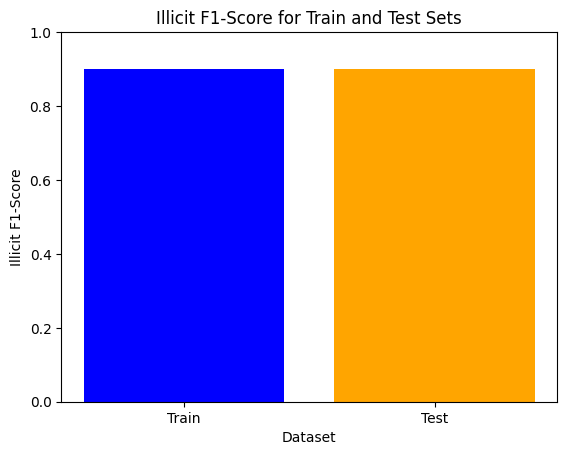

In [14]:
import matplotlib.pyplot as plt

# Define data
datasets = ['Train', 'Test']
illicit_f1_scores = [0.9008114319694773, 0.9008114319694773]

# Create bar plot
plt.bar(datasets, illicit_f1_scores, color=['blue', 'orange'])
plt.xlabel('Dataset')
plt.ylabel('Illicit F1-Score')
plt.title('Illicit F1-Score for Train and Test Sets')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Split the data into sequential train and test sets (replace with your actual data)
X_train = X[X['Time_step'] <= 34]
X_test = X[X['Time_step'] >= 35]
y_train = y[X['Time_step'] <= 34]
y_test = y[X['Time_step'] >= 35]

# Initialize and train models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
# xgb_model = XGBClassifier()

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
# xgb_model.fit(X_train, y_train)

# Predictions on the entire test set
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
# xgb_predictions = xgb_model.predict(X_test)

# Calculate illicit F1-score per time-step (assuming y_test contains labels for each time-step)
illicit_f1_per_timestep_lr = [f1_score(y_test[X_test['Time_step'] == t], lr_predictions[X_test['Time_step'] == t], average='weighted') for t in range(35, 50)]
illicit_f1_per_timestep_rf = [f1_score(y_test[X_test['Time_step'] == t], rf_predictions[X_test['Time_step'] == t], average='weighted') for t in range(35, 50)]
# illicit_f1_per_timestep_xgb = [f1_score(y_test[X_test['Time_step'] == t], xgb_predictions[X_test['Time_step'] == t], average='weighted') for t in range(35, 50)]

# Print or analyze the results
print("Weighted Average Illicit F1-score per time-step (Logistic Regression):", illicit_f1_per_timestep_lr)
print("Weighted Average Illicit F1-score per time-step (Random Forest):", illicit_f1_per_timestep_rf)
# print("Weighted Average Illicit F1-score per time-step (XGBoost):", illicit_f1_per_timestep_xgb)


Weighted Average Illicit F1-score per time-step (Logistic Regression): [0.6516167847877453, 0.6198450264942978, 0.7801819868950912, 0.6274154059905441, 0.41552281848469363, 0.6157335530792709, 0.6946979061035867, 0.57427348970266, 0.6152830209619191, 0.5507357820325458, 0.6861787910290195, 0.7078909603860422, 0.7596340962500588, 0.7677390143440298, 0.7194626617119623]
Weighted Average Illicit F1-score per time-step (Random Forest): [0.9158283613561338, 0.9277419712348872, 0.9594808490915991, 0.9146484904793819, 0.8488197301523959, 0.8643465652620876, 0.9016322742815882, 0.886204579996799, 0.8978537517805557, 0.7670328010895724, 0.9000309008972183, 0.9478701359408437, 0.9394118914764911, 0.9416755542389381, 0.9131283966089948]


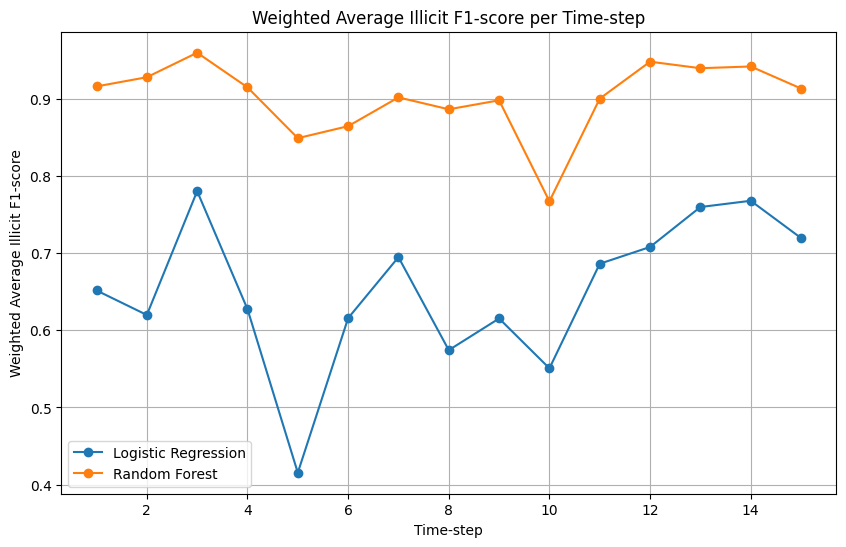

In [18]:
import matplotlib.pyplot as plt

# Time-steps
time_steps = range(1, 16)

# Weighted Average Illicit F1-scores per time-step for Logistic Regression and Random Forest
weighted_avg_f1_lr = [0.6516167847877453, 0.6198450264942978, 0.7801819868950912, 0.6274154059905441, 0.41552281848469363, 0.6157335530792709, 0.6946979061035867, 0.57427348970266, 0.6152830209619191, 0.5507357820325458, 0.6861787910290195, 0.7078909603860422, 0.7596340962500588, 0.7677390143440298, 0.7194626617119623]
weighted_avg_f1_rf = [0.9158283613561338, 0.9277419712348872, 0.9594808490915991, 0.9146484904793819, 0.8488197301523959, 0.8643465652620876, 0.9016322742815882, 0.886204579996799, 0.8978537517805557, 0.7670328010895724, 0.9000309008972183, 0.9478701359408437, 0.9394118914764911, 0.9416755542389381, 0.9131283966089948]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(time_steps, weighted_avg_f1_lr, marker='o', label='Logistic Regression')
plt.plot(time_steps, weighted_avg_f1_rf, marker='o', label='Random Forest')
plt.xlabel('Time-step')
plt.ylabel('Weighted Average Illicit F1-score')
plt.title('Weighted Average Illicit F1-score per Time-step')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
data['Time_step'].nunique()

49

In [21]:
data.head()

,txId,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,3


In [5]:
X = data.drop(columns=['class'])  # Assuming 'label' is the column representing the target
y = data['class']


In [6]:
X_train = X[X['Time_step'] <= 34]
X_test = X[X['Time_step'] >= 35]
y_train = y[X['Time_step'] <= 34]
y_test = y[X['Time_step'] >= 35]

In [7]:
import pandas as pd
import numpy as np
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.ocsvm import OCSVM
from pyod.models.cblof import CBLOF
from pyod.models.abod import ABOD
from pyod.models.iforest import IForest

# Load your data here (replace with your actual data loading code)
# X_train, X_test, y_train, y_test = ...

# Initialize the models
lof = LOF()
knn = KNN()
pca = PCA()
ocsvm = OCSVM()
cblof = CBLOF()
abod = ABOD()
iforest = IForest()

# Fit the models on the training data
lof.fit(X_train)
knn.fit(X_train)
pca.fit(X_train)
ocsvm.fit(X_train)
cblof.fit(X_train)
abod.fit(X_train)
iforest.fit(X_train)

# Predict anomalies on the test data
lof_pred = lof.predict(X_test)
knn_pred = knn.predict(X_test)
pca_pred = pca.predict(X_test)
ocsvm_pred = ocsvm.predict(X_test)
cblof_pred = cblof.predict(X_test)
abod_pred = abod.predict(X_test)
iforest_pred = iforest.predict(X_test)

# You can now use the predicted labels to evaluate the performance of these models
# For example, you can calculate precision, recall, F1-score, ROC-AUC, etc.

# Note: This code provides a basic example of how to use these models. You should
# customize and fine-tune the parameters, preprocess your data, and handle the
# evaluation metrics according to your specific use case.


: 

: 

In [7]:
import numpy as np
from pyod.models.lof import LOF
from pyod.models.knn import KNN
from pyod.models.pca import PCA
from pyod.models.ocsvm import OCSVM
from pyod.models.cblof import CBLOF
from pyod.models.abod import ABOD
from pyod.models.iforest import IForest
from sklearn.metrics import f1_score

# Load your data and split it into X_train, X_test, y_train, y_test

# Initialize the models
lof = LOF()
knn = KNN()
pca = PCA()
ocsvm = OCSVM()
cblof = CBLOF()
abod = ABOD()
iforest = IForest()

models = {'LOF': lof, 'KNN': knn, 'PCA': pca, 'OCSVM': ocsvm, 'CBLOF': cblof, 'ABOD': abod, 'IForest': iforest}

contamination_levels = np.arange(0, 1.05, 0.05)

results = {}

for model_name, model in models.items():
    illicit_f1_scores = []
    for contamination in contamination_levels:
        # Fit the model on the training data
        model.fit(X_train)
        
        # Predict anomalies on the test data
        y_pred = model.predict(X_test)
        
        # Set a threshold based on contamination level
        threshold = np.percentile(model.decision_scores_, 100 * (1 - contamination))
        y_pred_threshold = y_pred >= threshold
        
        # Calculate illicit F1-score
        illicit_f1 = f1_score(y_test, y_pred_threshold, pos_label=1)
        illicit_f1_scores.append(illicit_f1)
        
    results[model_name] = illicit_f1_scores

# Print the results
for model_name, illicit_f1_scores in results.items():
    print(f"Illicit F1-scores for {model_name}: {illicit_f1_scores}")


In [ ]:
def setup_train_test_idx(X, last_train_time_step, last_time_step, aggregated_timestamp_column='Time_step'):
    """ The aggregated_time_step_column needs to be a column with integer values, such as year, month or day """

    split_timesteps = {}

    split_timesteps['train'] = list(range(last_train_time_step + 1))
    split_timesteps['test'] = list(range(last_train_time_step + 1, last_time_step + 1))

    train_test_idx = {}
    train_test_idx['train'] = X[X[aggregated_timestamp_column].isin(split_timesteps['train'])].index
    train_test_idx['test'] = X[X[aggregated_timestamp_column].isin(split_timesteps['test'])].index

    return train_test_idx


def train_test_split(X, y, train_test_idx):
    X_train_df = X.loc[train_test_idx['train']]
    X_test_df = X.loc[train_test_idx['test']]

    y_train = y.loc[train_test_idx['train']]
    y_test = y.loc[train_test_idx['test']]

    return X_train_df, X_test_df, y_train, y_test

NameError: name 'pd' is not defined

In [8]:
df.head()

,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
2,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,0.041399,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
4,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,0.038305,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,3


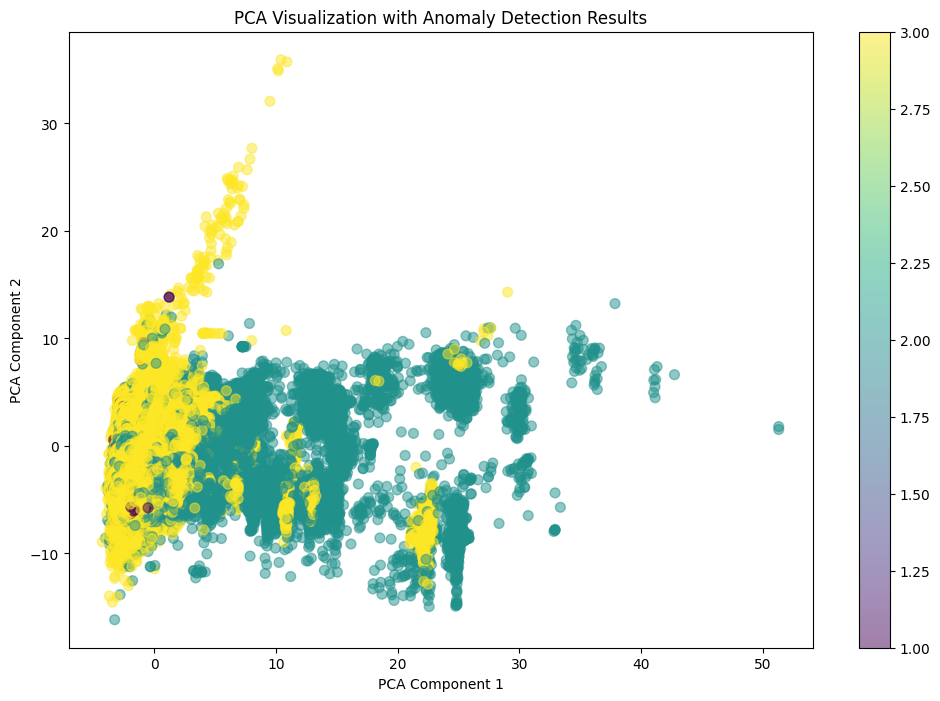

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from pyod.models.cblof import CBLOF
from pyod.models.abod import ABOD
from pyod.models.iforest import IForest

# Load the dataset


# Drop unnecessary columns (if needed)
# df = df.drop(['txId'], axis=1)

# Separate features and labels
X = df.drop(['class'], axis=1)
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# # Apply Local Outlier Factor (LOF)
# lof = LocalOutlierFactor(contamination=0.05)
# lof_pred = lof.fit_predict(X_scaled)

# # Apply K-Nearest Neighbors (KNN)
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_scaled, y)
# knn_pred = knn.predict(X_scaled)

# # Apply One-Class SVM (OCSVM)
# ocsvm = OneClassSVM(nu=0.05)
# ocsvm_pred = ocsvm.fit_predict(X_scaled)

# # Apply Cluster-based Local Outlier Factor (CBLOF)
# cblof = CBLOF(contamination=0.05)
# cblof_pred = cblof.fit_predict(X_scaled)

# # Apply Angle-based Outlier Detection (ABOD)
# abod = ABOD(contamination=0.05)
# abod_pred = abod.fit_predict(X_scaled)

# # Apply Isolation Forest (IF)
# iforest = IForest(contamination=0.05)
# iforest_pred = iforest.fit_predict(X_scaled)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'PCA_1': X_pca[:, 0],
    'PCA_2': X_pca[:, 1],
    
    'Actual': y
})

# Visualize the results (you can customize this based on your needs)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(results['PCA_1'], results['PCA_2'], c=results['Actual'], cmap='viridis', s=50, alpha=0.5)
plt.title('PCA Visualization with Anomaly Detection Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import OneClassSVM
from pyod.models.cblof import CBLOF
from pyod.models.abod import ABOD
from pyod.models.iforest import IForest

# Load the dataset


# Drop unnecessary columns (if needed)
# df = df.drop(['txId'], axis=1)

# Separate features and labels
X = df.drop(['class'], axis=1)
y = df['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(contamination=0.05)
lof_pred = lof.fit_predict(X_scaled)

# # Apply K-Nearest Neighbors (KNN)
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_scaled, y)
# knn_pred = knn.predict(X_scaled)

# # Apply One-Class SVM (OCSVM)
# ocsvm = OneClassSVM(nu=0.05)
# ocsvm_pred = ocsvm.fit_predict(X_scaled)

# # Apply Cluster-based Local Outlier Factor (CBLOF)
# cblof = CBLOF(contamination=0.05)
# cblof_pred = cblof.fit_predict(X_scaled)

# # Apply Angle-based Outlier Detection (ABOD)
# abod = ABOD(contamination=0.05)
# abod_pred = abod.fit_predict(X_scaled)

# # Apply Isolation Forest (IF)
# iforest = IForest(contamination=0.05)
# iforest_pred = iforest.fit_predict(X_scaled)

# Create a DataFrame to store the results
results = pd.DataFrame({
    
    
    
    'Actual': y
})

# Visualize the results (you can customize this based on your needs)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(results['PCA_1'], results['PCA_2'], c=results['Actual'], cmap='viridis', s=50, alpha=0.5)
plt.title('PCA Visualization with Anomaly Detection Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [3]:
# Drop unnecessary columns (if needed)
df = df.drop(['txId'], axis=1)

# Separate features and labels
X = df.drop(['class'], axis=1)
y = df['class']

In [4]:
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

In [5]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 1 || accuracy (0.4198)


/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 3 || accuracy (0.4198)


/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 5 || accuracy (0.4198)


/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 7 || accuracy (0.4198)


/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


n_neighbors= 9 || accuracy (0.4198)


In [6]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Apply RobustScaler to your data
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

results = []
strategies = [str(i) for i in [1, 3, 5, 7, 9]]

for s in strategies:
    # Define a pipeline with KNNImputer and LogisticRegression
    pipeline = Pipeline(steps=[
        ('i', KNNImputer(n_neighbors=int(s))),
        ('m', LogisticRegression(max_iter=1000))  # Increase max_iter value
    ])
    
    # Calculate cross-validation accuracy scores
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors = %s || accuracy = %.4f' % (s, mean(scores)))


n_neighbors = 1 || accuracy = 0.4870
n_neighbors = 3 || accuracy = 0.4870
n_neighbors = 5 || accuracy = 0.4870
n_neighbors = 7 || accuracy = 0.4870
n_neighbors = 9 || accuracy = 0.4870


In [7]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from statistics import mean

# Check if there are any missing values in the dataset
if X.isnull().sum().sum() == 0:
    print("No missing values in the dataset.")
else:
    # Apply RobustScaler to your data
    robustscaler = RobustScaler()
    X1 = robustscaler.fit_transform(X)

    results = []
    strategies = [str(i) for i in [1, 3, 5, 7, 9]]

    for s in strategies:
        # Define a pipeline with KNNImputer and LogisticRegression
        pipeline = Pipeline(steps=[
            ('i', KNNImputer(n_neighbors=int(s))),
            ('m', LogisticRegression(max_iter=1000))  # Increase max_iter value
        ])

        # Calculate cross-validation accuracy scores
        scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
        results.append(scores)
        print('n_neighbors = %s || accuracy = %.4f' % (s, mean(scores)))


No missing values in the dataset.


In [ ]:
from sklearn import pipeline

In [12]:
def get_data_transformer_object():

    robust_scaler = RobustScaler()
    simple_imputer = SimpleImputer(strategy="constant", fill_value=0)
    preprocessor = Pipeline(
        steps=[
            ("Imputer", simple_imputer), #replace missing values with zero
            ("RobustScaler", robust_scaler) #keep every feature in same range and handle outlier
            ]
    )
    
    return preprocessor

In [13]:
d = get_data_transformer_object()
print(d.fit_transform(X))

[[-7.58620690e-01 -5.60430682e-02 -4.13881588e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.58620690e-01 -7.13516565e-02 -4.13881588e-01 ... -2.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-7.58620690e-01  8.16792458e+00  1.67622043e+01 ...  1.80000000e+01
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.96551724e-01 -6.90603133e-02  4.37431451e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.96551724e-01 -8.94136289e-02 -3.49564390e-01 ... -1.00000000e+00
   6.01591184e+00  6.84480948e+00]
 [ 8.96551724e-01  3.86364706e+00  4.96657906e-03 ... -1.00000000e+00
   6.01591184e+00  6.84480948e+00]]


In [14]:
df.head(0)

,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class


In [15]:
df.dtypes

Time_step                 int64
Local_feature_1         float64
Local_feature_2         float64
Local_feature_3         float64
Local_feature_4         float64
                         ...   
Aggregate_feature_69    float64
Aggregate_feature_70    float64
Aggregate_feature_71    float64
Aggregate_feature_72    float64
class                     int64
Length: 167, dtype: object

In [4]:
num_features = X.select_dtypes(exclude="object").columns


In [5]:
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [6]:
X_knn =knn_pipeline.fit_transform(X)

In [7]:
X_knn

array([[-7.58620690e-01, -5.60430682e-02, -4.13881588e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.58620690e-01, -7.13516565e-02, -4.13881588e-01, ...,
        -2.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.58620690e-01,  8.16792458e+00,  1.67622043e+01, ...,
         1.80000000e+01,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 8.96551724e-01, -6.90603133e-02,  4.37431451e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.96551724e-01, -8.94136289e-02, -3.49564390e-01, ...,
        -1.00000000e+00,  6.01591184e+00,  6.84480948e+00],
       [ 8.96551724e-01,  3.86364706e+00,  4.96657906e-03, ...,
        -1.00000000e+00,  6.01591184e+00,  6.84480948e+00]])

In [8]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)


KeyboardInterrupt: 

In [4]:
df = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/dataset.csv')

In [5]:
# Drop unnecessary columns (if needed)
df = df.drop(['txId'], axis=1)

# Separate features and labels
X = df.drop(['class'], axis=1)
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.70      0.81       836
           2       0.94      0.85      0.89      8420
           3       0.96      0.98      0.97     31498

    accuracy                           0.95     40754
   macro avg       0.95      0.85      0.89     40754
weighted avg       0.95      0.95      0.95     40754



In [7]:
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [8]:
X_knn =knn_pipeline.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.70      0.80       836
           2       0.94      0.85      0.89      8420
           3       0.96      0.98      0.97     31498

    accuracy                           0.95     40754
   macro avg       0.94      0.85      0.89     40754
weighted avg       0.95      0.95      0.95     40754



In [ ]:


merged_data = features_data.merge(classes_data, on='txId', how='left')

In [11]:
# Load the three datasets
classes_data = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_classes.csv')
edgelist_data = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_edgelist.csv')
features_data = pd.read_csv('/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_features.csv')

In [12]:
classes_data.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [13]:
features_data.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [17]:
from script.constant.training_pipeline import SCHEMA_FILE_PATH
from script.utils.main_utils import read_yaml_file

In [16]:
def merge_dataset(df_class, df_feature):

  schema_config = read_yaml_file(SCHEMA_FILE_PATH)

  column_names = schema_config['columns_names']


SyntaxError: unexpected EOF while parsing (1069177331.py, line 1)

In [18]:
schema_config = read_yaml_file(SCHEMA_FILE_PATH)

column_names = schema_config['columns_names']


MoneyLaunderingException: <module 'sys' (built-in)>

In [3]:
import pandas as pd 

In [4]:
df = pd.read_csv("/home/suyodhan/Money-Laundering-Prevention/artifact/20230804_155514/data_ingestion/ingested/train.csv")

In [5]:
df.head()

,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,18,-0.165656,-0.081127,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163043,-0.162660,...,-0.411776,-0.979074,-0.978556,0.018279,-0.010592,0.054769,0.074770,-1.760926,-1.760984,2
1,7,1.358453,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,1.403240,1.375465,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,36,-0.016933,0.140448,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.003975,-0.012027,...,-0.594691,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
3,16,-0.118100,-0.191625,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.107493,-0.114094,...,-0.607306,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
4,30,-0.171712,-0.118661,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.163634,-0.168188,...,-0.607306,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown


In [6]:
df['class'].value_counts()

unknown    125760
2           33605
1            3649
Name: class, dtype: int64

In [7]:
import shutil

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("/home/suyodhan/Money-Laundering-Prevention/artifact/20230804_155514/data_ingestion/ingested/train.csv")

In [10]:
df.head()

,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,18,-0.165656,-0.081127,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163043,-0.162660,...,-0.411776,-0.979074,-0.978556,0.018279,-0.010592,0.054769,0.074770,-1.760926,-1.760984,2
1,7,1.358453,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,1.403240,1.375465,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,36,-0.016933,0.140448,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.003975,-0.012027,...,-0.594691,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
3,16,-0.118100,-0.191625,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.107493,-0.114094,...,-0.607306,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
4,30,-0.171712,-0.118661,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.163634,-0.168188,...,-0.607306,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown


In [11]:
from script.constant.training_pipeline import *

In [12]:
from script.ml.model.estimetor import TargetValueMapping

In [13]:
TargetValueMapping().to_dict()

{'unknown': 3}

In [14]:
# target_feature_train_df = df[TARGET_COLUMN]
# target_feature_train_df = target_feature_train_df.replace( TargetValueMapping().to_dict())

In [15]:
input_feature_train_df = df.drop(columns=[TARGET_COLUMN])
target_feature_train_df = df[TARGET_COLUMN]
target_feature_train_df = target_feature_train_df.replace( TargetValueMapping().to_dict())

In [16]:
target_feature_train_df.value_counts()

3    125760
2     33605
1      3649
Name: class, dtype: int64

In [17]:
target_feature_train_df = target_feature_train_df.astype(int)

In [21]:
# X = df.drop(columns=['class'])
# y = df['class']
# y = df['class'].replace({'unknown': 3})

In [22]:
# Assuming you have already defined target_feature_train_df and y

if target_feature_train_df.equals(y):
    print("Outputs are the same.")
else:
    print("Outputs are different.")


Outputs are the same.


In [23]:
import pandas as pd

# Assuming x and target are your two dataframes

if y.equals(target_feature_train_df):
    print("Yes, the dataframes are the same.")
else:
    print("No, the dataframes are not the same.")


Yes, the dataframes are the same.


In [24]:
input_feature_train_df.head()

,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,Local_feature_9,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,18,-0.165656,-0.081127,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.163043,-0.162660,...,-0.352911,-0.411776,-0.979074,-0.978556,0.018279,-0.010592,0.054769,0.074770,-1.760926,-1.760984
1,7,1.358453,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,1.403240,1.375465,...,-0.577099,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,36,-0.016933,0.140448,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.003975,-0.012027,...,-0.554681,-0.594691,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
3,16,-0.118100,-0.191625,0.463609,-0.121970,-0.043875,-0.113002,-0.061584,-0.107493,-0.114094,...,-0.569626,-0.607306,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
4,30,-0.171712,-0.118661,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.163634,-0.168188,...,-0.569626,-0.607306,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792


In [25]:
target_feature_train_df.dtype

dtype('O')

In [26]:
y.dtype

dtype('O')

In [18]:

# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(input_feature_train_df)

In [19]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
    scores = cross_val_score(pipeline, X1, target_feature_train_df, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.9455)
n_neighbors= 3 || accuracy (0.9450)
n_neighbors= 5 || accuracy (0.9453)
n_neighbors= 7 || accuracy (0.9453)
n_neighbors= 9 || accuracy (0.9452)


In [23]:
num_features = input_feature_train_df.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

In [24]:

X_knn =knn_pipeline.fit_transform(input_feature_train_df)

In [20]:
# X = df.drop(columns=['class'])
# y = df['class'].replace({'unknown': 3})

# # Fit with robust scaler for KNN best K-selection experiment
# robustscaler = RobustScaler()
# X1 = robustscaler.fit_transform(X)

# results = []
# # define imputer
# imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')
# strategies = [str(i) for i in [1, 3, 5, 7, 9]]
# from sklearn.metrics import make_scorer, accuracy_score

# # ... (previous code)

# for s in strategies:
#     pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
#     scores = cross_val_score(pipeline, X1, y, scoring=make_scorer(accuracy_score), cv=2, n_jobs=-1)
#     results.append(scores)
#     print('n_neighbors = %s || accuracy (%.4f)' % (s, mean(scores)))


In [32]:
print(type(X1))

<class 'numpy.ndarray'>


In [33]:
print(type(y))

<class 'pandas.core.series.Series'>


In [26]:
# num_features = X.select_dtypes(exclude="object").columns

# # Fit the KNN imputer with selected K-value
# knn_pipeline = Pipeline(steps=[
#     ('imputer', KNNImputer(n_neighbors=1)),
#     ('RobustScaler', RobustScaler())
# ])

In [27]:
X_knn =knn_pipeline.fit_transform(X)

In [25]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, target_feature_train_df)

KeyboardInterrupt: 

In [27]:
len(target_feature_train_df)

163014

In [28]:
target_feature_train_df.shape

(163014,)

NameError: name 'df' is not defined

In [36]:
y.shape

(163014,)

In [1]:
from datetime import datetime

In [3]:
now = datetime.now().strftime("%Y-%m-%d")

In [4]:
now

'2023-08-07'

In [5]:
datetime.now().timestamp()

1691416112.792745

In [8]:
import shutil

In [9]:
data = pd.read_csv("/home/suyodhan/Money-Laundering-Prevention/artifact/20230808_020839/data_ingestion/feature_store/money_laund.csv")

In [11]:
data.isnull().sum()

txId                    0
Time_step               0
Local_feature_1         0
Local_feature_2         0
Local_feature_3         0
                       ..
Aggregate_feature_69    0
Aggregate_feature_70    0
Aggregate_feature_71    0
Aggregate_feature_72    0
class                   1
Length: 168, dtype: int64

In [13]:
class_data = pd.read_csv("/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_classes.csv")
features_data = pd.read_csv("/home/suyodhan/Money-Laundering-Prevention/dataset/elliptic_txs_features.csv")

In [14]:
class_data.shape

(300, 2)

In [15]:
features_data.shape

(300, 167)

In [16]:
class_data.isnull().sum()

txId     0
class    0
dtype: int64

In [20]:
features_data.isnull().sum().T

230425980               0
1                       0
-0.1714692896288031     0
-0.18466755143291433    0
-1.2013688016765636     0
                       ..
-0.0874901561101501     0
-0.13115530389558736    0
-0.09752359377152515    0
-0.12061340670311574    0
-0.11979245961251665    0
Length: 167, dtype: int64

In [21]:
dat = features_data.merge(class_data, on='txId', how='left')

KeyError: 'txId'

In [1]:
from script.logger import logging

In [2]:
logging.warning("Some specified numerical columns are missing.")

In [3]:
logging.error("Error occurred during class label")

In [5]:
# Importing the Tuple class from the collections module
from collections import tuple

# Creating a tuple
my_tuple = Tuple([1, 2, 3])

# Using methods and attributes of the Tuple class
print(my_tuple.count(2))  # Output: 1
print(my_tuple[1])        # Output: 2


ImportError: cannot import name 'tuple' from 'collections' (/home/suyodhan/Money-Laundering-Prevention/venv/lib/python3.7/collections/__init__.py)

In [1]:
import pandas as pd
from script.constant.prediction_pipeline import *

In [2]:
prediction_df = pd.read_csv(PREDICTION_INPUT_FILE_PATH)

In [3]:
prediction_df.head()

,txId,Time_step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72,class
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,3
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,3
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,3
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540,3
